# Predict Chicago Crime Rate 

## Loading and Visualizing the Data

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from fbprophet import Prophet

Sometimes there are fields missing, but one thing you could do to combat is to include error bad lines as False

In [2]:
chicago_1 = pd.read_csv('/Users/sophie/Desktop/DL_ML/Project_3/Chicago_Crimes_2001_to_2004.csv', error_bad_lines = False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
chicago_2 = pd.read_csv('/Users/sophie/Desktop/DL_ML/Project_3/Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)

b'Skipping line 533719: expected 23 fields, saw 24\n'


In [4]:
chicago_3 = pd.read_csv('/Users/sophie/Desktop/DL_ML/Project_3/Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)

b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [5]:
chicago_4 = pd.read_csv('/Users/sophie/Desktop/DL_ML/Project_3/Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)

How to put all the data into one data frame. 

In [6]:
chicago_df = pd.concat([chicago_2, chicago_3, chicago_4])
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


### See how many elements are missing in the data frame 

In [7]:
# plt.figure(figsize=(10,10))
# sns.heatmap(chicago_df.isnull(), cbar = False, cmap = "Blues")

### Dropping Unnecessary Columns 

In [8]:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'], inplace = True, axis = 1)

In [9]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [10]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


### Proper Format for Date

In [12]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [13]:
chicago_df.index

DatetimeIndex(['2006-04-02 13:00:00', '2006-02-26 13:40:48',
               '2006-01-08 23:16:00', '2006-04-05 18:45:00',
               '2006-02-17 21:03:14', '2006-03-30 22:30:00',
               '2006-04-05 12:10:00', '2006-04-05 15:00:00',
               '2006-04-05 21:30:00', '2006-04-03 03:00:00',
               ...
               '2016-05-03 23:30:00', '2016-05-03 23:50:00',
               '2016-05-03 22:25:00', '2016-05-03 23:00:00',
               '2016-05-03 23:28:00', '2016-05-03 23:33:00',
               '2016-05-03 23:30:00', '2016-05-03 00:15:00',
               '2016-05-03 21:07:00', '2016-05-03 23:38:00'],
              dtype='datetime64[ns]', name='Date', length=6017767, freq=None)

In [14]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


### Graph Type of Crimes

In [15]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [16]:
chicago_df['Primary Type']. value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [17]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

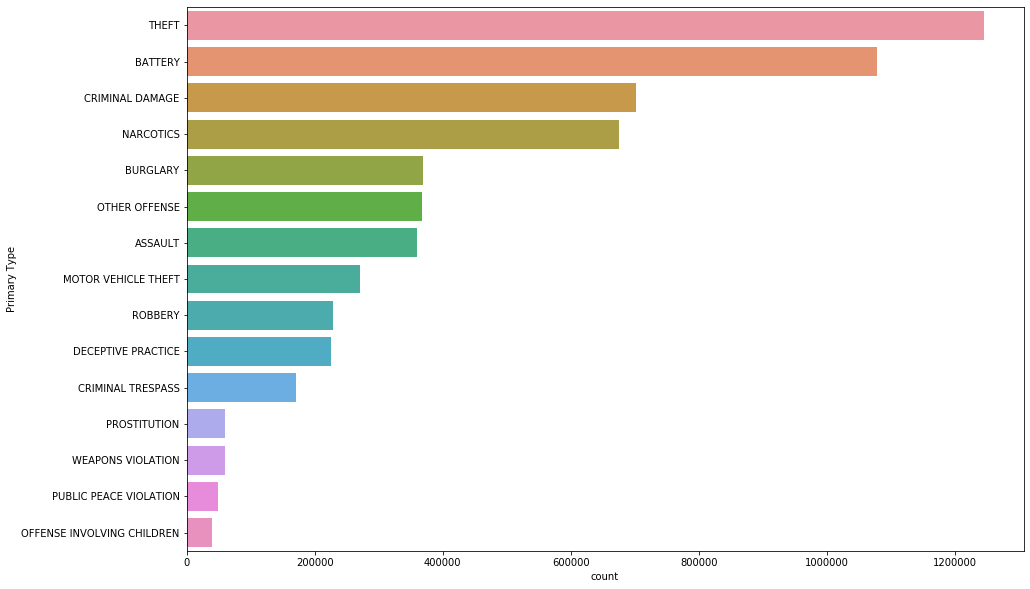

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(y = 'Primary Type', data=chicago_df, order=order_data)

### Location of the Crimes

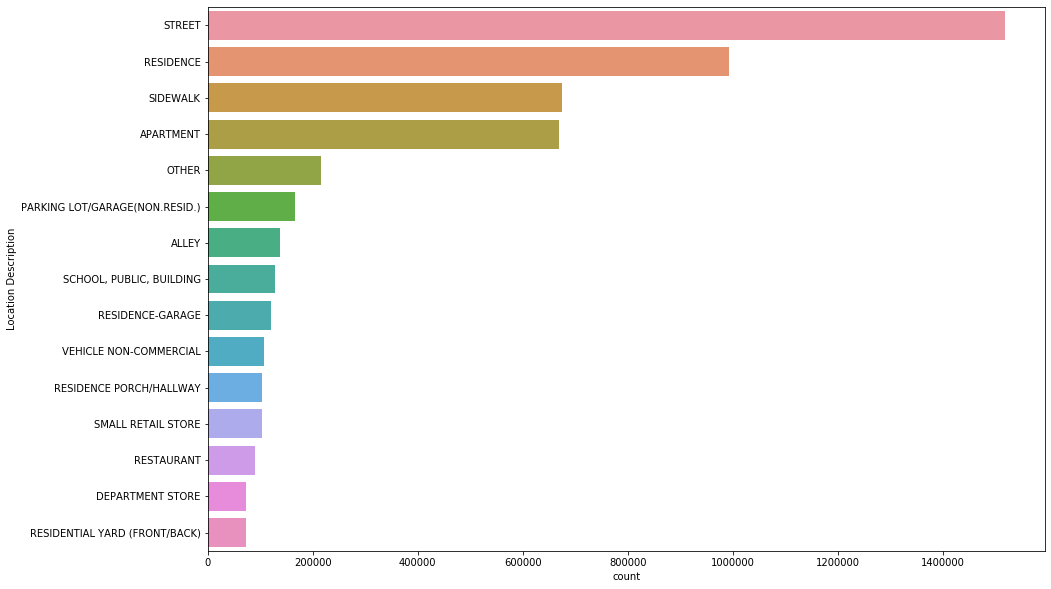

In [19]:
plt.figure(figsize = (15,10))
sns.countplot(y='Location Description', data=chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

### The Amount of Crimes that Occur within a Specific Year 

In [20]:
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

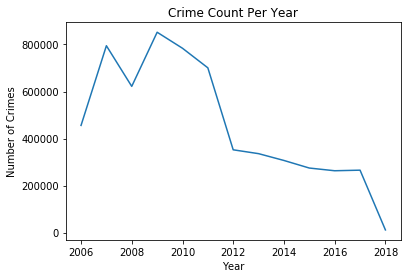

In [21]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

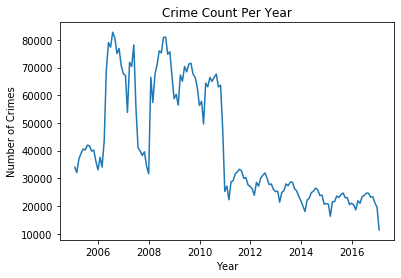

In [22]:
plt.plot(chicago_df.resample('m').size())
plt.title('Crime Count Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

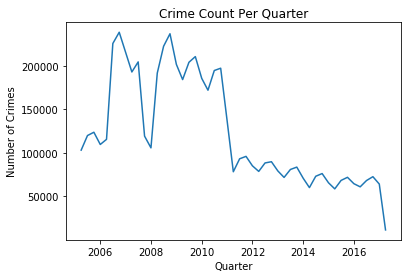

In [23]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Count Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')

## Preparing the Data

In [24]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [25]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [27]:
chicago_prophet.columns = ['Date', 'Crime Count']
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [29]:
chicago_prophet_df = chicago_prophet.rename(columns = {'Date':'ds', 'Crime Count':'y'})

In [30]:
chicago_prophet 

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


### Make Predictions

In [31]:
m = Prophet ()

The math from Prophet will mathematically try to fit the data together preparing it for prediction. 

In [33]:
m.fit(chicago_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### Prophet takes the crime values and predict a trend

In [43]:
future = m.make_future_dataframe(periods = 720)

In [44]:
# create upper and lower bound 
forecast = m.predict(future)

/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



### The graph predicts data for 2018 & 2019

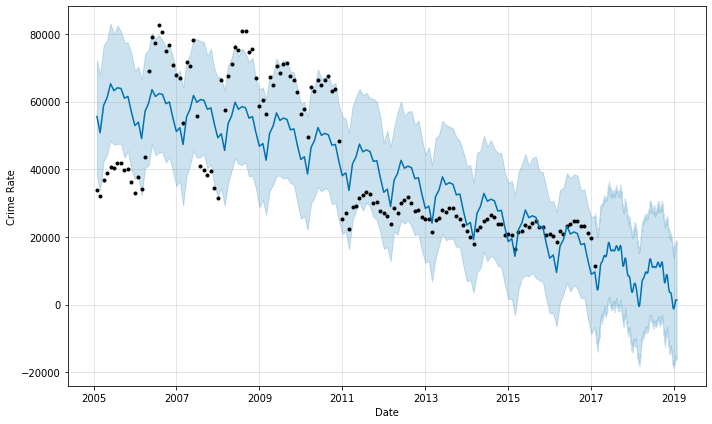

In [45]:
figure = m.plot(forecast, xlabel = 'Date', ylabel="Crime Rate")

/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



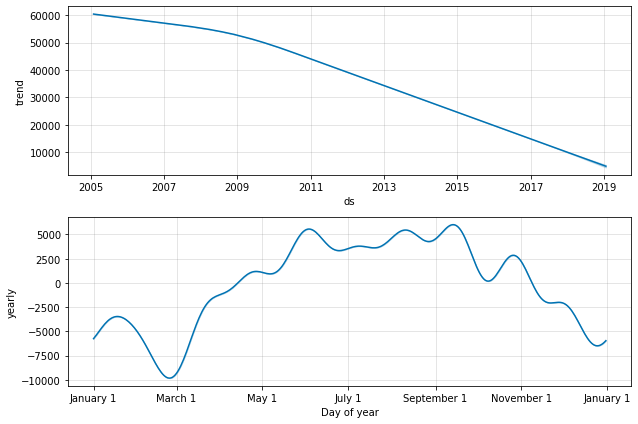

In [46]:
figure = m.plot_components(forecast)

Crime tends to be lower when it is colder in the winter time. 